In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

# 第23章 時間序列基本概念

## 23.1 認識時間序列

常見的金融資料一般分為橫斷面資料（Cross Section Data）、時間序列資料（Time Series Data）、追蹤資料（Panel Data）這三種。

* 橫斷面資料是記錄不同個體在同一時間的屬性或特徵變數的數據。例如，在不同公司同一時間發布的財務報表中，同一年度這些公司的淨收益（Net Income）資料屬於橫斷面資料。

* 時間序列資料記錄的是同一個個體的某個特徵隨著時間推移不斷發展的過程，例如，日存款利率，股票的日收盤價、公司每年發放的股利等等都屬於時間序列資料。

* 追蹤資料刻畫的是不同個體的某個特徵隨著時間的推移各自變化的經過，例如所有上市公司股票每一天的日收益率、所有公司的年銷售額（Total Sales）數據等都屬於追蹤資料。

舉一個簡單的例子，將加權股價指數每天的收盤指數按照時間先後順序彙總在一起就構成一組時間序列資料，如果將這組資料的時間為橫座標、對應的收盤指數為縱座標，即可得到一張說明加權股價指數隨時問變動的曲線圖，該曲線圖一般被稱時間序列圖（簡稱時序圖）。

># 圖23.1：加權股價指數收盤指數時序圖 

圖 23.1 呈現的是 2014 年 1 月 2 日到 2015 年 12 月 31 日期間，加權股價指數每天收盤指數隨時間的變動情況時序圖。

隨著電腦技術的發展及普及，儲存和獲取資料變得越來越容易，投資人面對的訊息也隨之迅速增加，而且許多資料為時間序列資料，例如每年 GDP 成長率、每月 CPI 指數；某行業每年的總體銷售額、消費者數量；說明微觀層面個體特徵的資料，如公司每年的銷售額、淨利潤，基金公司每年的表現等。

作為投資人，與財富最直接相關的是資產價格序列，當我們觀察這些不斷變動的價格序列時，可能會提出一些問題：資產價格的波動是否存在一定的規律？是否可以抓住這些規侓並從中獲利？一些資產不同時間段價格的波動幅度可能不相同，在某些時間段裡價格可能會有劇烈波動，而另一些時間則比較定態。我們能否捕捉到價格波動幅度的變化規律來更好地進行風險控制？當面對多個資產的價格序列時，我們可能會好奇這些價格序列間是否存在某些關係，能否發現它們之間的關聯並用於交易中？這些疑問在本部分時間序列分析中或許可以找到某些答案或者得到一些啟發性思考。

時間序列資料從本質上看，是用量化的方式說明個體特徵的歷史記錄。法國文豪雨果曾給「歷史」這個詞做了一個定義：「歷史是過去傳到未來的回聲，是未來對過去的反映。」（What is history? An echo of the past in the future; a reflex from the future on the past）；英國哲學家弗蘭西斯．培根曾說過：「讀史可以明智」。時間序列分析量化地分析歷史、預測未來，以指導分析者當下做出更好的判斷和決策。

一般來講，時問序列分析涉及以下幾個主要內容：

* 資料有哪些基本特徵？

* 資料是否有規律可循？

* 如果資料存在某種規律，我們如何透過統計模型找到並說明這種規律？

* 多個時間序列之間是否存在某種關聯？如何刻畫這種關聯？

* 如何利用歷史資料表現出來的規律對未來進行預測？

時間序列分析的主要工作就是透過觀察、分析，找到資料序列中的規律，以預測未來。在進行時間序列資料分析之前，我們加深理解一下時間序列的定義。通常我們把按照某一順序排列起來的一組隨機變數叫做隨機序列（Random Sequence），如果隨機變數依據時間排序，則稱這組依照時間排序的隨機序列為時間序列。亦即，按時問順序排列的一組隨機變數稱為時間序列，可以用數學式表達為：$X_1,X_2,...,X_t,...$。

按照時間順序把隨機變數的實現值記錄下來就構成了一個時間序列，這一個時間序列是隨機序列的實現值序列，可以記錄為：$x_1,x_2,...,x_t,...$。時問序列和時間序列的實現值看上去相似，但有著本質的區別。例如，$X_1$ 是一個隨機變數，它的取值是隨機的、可能取 1、也可能取 100；而 $x_1$ 是一個數值，它是 $X_1$ 的一個實現值。通常，我們抓取的資料都是時問序列的實現值，之後就不再加以強調。

## 23.2 Python 中的時間序列資料

本章開頭加權股價指數收盤指數時序圖是用 Python 程式碼畫出的，下面介紹程式碼具體如何撰寫。

In [2]:
import pandas as pd
taiex=pd.read_csv('.\\PythonBook_code_data\\part4\\taiex.csv',sep='\t')

# 查詢前 3 期數據
print(taiex.head(n=3))

# 查詢數據 taiex 的類型
type(taiex)

# 提取加權股價指數的收盤指數數據
Close=taiex.Close
Close.head(n=3)

type(Close)

type(Close.index)

   Unnamed: 0        Date     Open     High      Low    Close   Volume
0           0  2014-01-02  8618.60  8632.81  8587.54  8612.54  4462792
1           1  2014-01-03  8584.74  8584.74  8537.86  8546.54  4406184
2           2  2014-01-06  8553.00  8568.24  8488.64  8500.01  4556810


pandas.core.frame.DataFrame

0    8612.54
1    8546.54
2    8500.01
Name: Close, dtype: float64

pandas.core.series.Series

pandas.core.indexes.range.RangeIndex

在 Python 中讀取的加權股價指數的交易資料 taiex 是 DataFrame 類別，加權股價指數的收盤指數資料（Clsindex）則是 Series 類別。為了更好地分析加權股價指數收盤指數的一些特徵，我們需要將其轉化成時間序列類別。在 Python 中，時間序列資料同樣是 pandas 套件中的 DataFrame 或是 Series，但其索引為日期類別。

Date
2014-01-02    8612.54
2014-01-03    8546.54
2014-01-06    8500.01
2014-01-07    8512.30
2014-01-08    8556.01
Name: Close, dtype: float64

pandas.core.series.Series

pandas.core.indexes.datetimes.DatetimeIndex

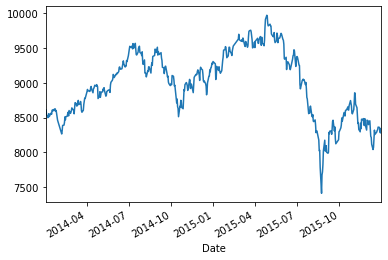

In [3]:
Close.index=pd.to_datetime(taiex.Date)
Close.head()

# 查詢 Close 的類型
type(Close)

type(Close.index)

# 最後，繪製時間序列圖
%matplotlib inline
Close.plot()
#圖形展示在本章第一節認識時間序列中

## 23.3 選取特定日期的時間序列資料

拿到一筆資料，我們或許只研究其中某一時間段的資料，並不一定處理所有內容。假設原始資料記錄了長達 20 年的日度交易數據，而我們只研究 2015 年 6 月 1 日以後的資料，將所研究時間段的數據提取出來不失為一種節省記憶體的做法。如何透過 Python 程式碼實作呢？Pandas 套件為我們篩選資料子集提供了很多方便，接下來將舉例說明如何根據特定條件從時間序列資料中截取出子集。

1. 篩選出某一時間段內的資料，例如，篩選出加權股價指數 2015 年 10 月 8 日到 2015 年 10 月 31 日區間內的資料，Python 程式碼示例如下：

In [4]:
taiex.index = pd.to_datetime(taiex.Date)
taiex=taiex.iloc[:,1:]

# 截取 2015 年 10 月 8 日到 11 月 1 日的資料
taiexPart = taiex['2015-10-8':'2015-10-31']

# 檢視前兩期交易資料
print(taiexPart.head(n=2))

# 檢視後兩期交易資料
print(taiexPart.tail(n=2))

                  Date     Open     High      Low    Close   Volume
Date                                                               
2015-10-08  2015-10-08  8528.46  8544.93  8434.50  8445.96  4582747
2015-10-12  2015-10-12  8478.34  8578.22  8478.34  8573.72  4663975
                  Date     Open     High      Low    Close   Volume
Date                                                               
2015-10-29  2015-10-29  8682.58  8704.59  8568.13  8571.08  4608149
2015-10-30  2015-10-30  8578.25  8586.90  8503.69  8554.31  4366502


2. 篩選某一特定年份的資料，可以直接以某一年為索引值，程式碼如下：

In [5]:
# 截取 2015 年資料
taiex2015=taiex['2015']

# 檢視 2015 年前 2 期交易資料
print(taiex2015.head(n=2))

# 檢視 2015 年後 2 期交易資料
print(taiex2015.tail(n=2))

                  Date     Open     High      Low    Close   Volume
Date                                                               
2015-01-05  2015-01-05  9292.31  9292.31  9182.02  9274.11  4852267
2015-01-06  2015-01-06  9209.93  9209.93  9043.44  9048.34  6230285
                  Date     Open     High      Low    Close   Volume
Date                                                               
2015-12-30  2015-12-30  8313.37  8342.34  8262.52  8279.99  3048259
2015-12-31  2015-12-31  8273.77  8338.06  8258.73  8338.06  2499013


3. 選取某個時間點之前或者之後的資料，如果我們想要選取 2015 年以前的資料或者是 2015 年以後的資料，我們可以按照上面介紹的第一種方法找到時間的起點和終點進行篩選。此外，我們還可以採用一種更簡單的辦法，即只用一個「：」來實作我們的篩選。例如說要選取 2015 年以前的資料或選取 2015 年以後的資料，我們就可以匯入以下程式碼：

In [6]:
# 選取 2015 年初以後的資料
taiexAfter2015=taiex['2015':]
print(taiexAfter2015.head(n=2))

# 選取 2015 年初以前的資料
taiexAfter2015=taiex[:'2015-01-01']
print(taiexAfter2015.tail(n=2))

                  Date     Open     High      Low    Close   Volume
Date                                                               
2015-01-05  2015-01-05  9292.31  9292.31  9182.02  9274.11  4852267
2015-01-06  2015-01-06  9209.93  9209.93  9043.44  9048.34  6230285
                  Date     Open     High      Low    Close   Volume
Date                                                               
2014-12-30  2014-12-30  9299.10  9338.06  9262.70  9268.43  4315769
2014-12-31  2014-12-31  9260.46  9307.26  9252.31  9307.26  3476527


4. 選取某一年中某幾個的資料，「：」除了可以篩選出某一時刻之前和之後的資料，還可以篩選出某幾個月的資料。下面的程式碼是選取從 2014 年 9 月到 2014 年底的資料：

In [7]:
# 選取 2014 年 9 月到年底的資料
taiex9End=taiex['2014-09':'2014']
print(taiex9End.head(n=2))

print(taiex9End.tail(n=2))

                  Date     Open     High      Low    Close   Volume
Date                                                               
2014-09-01  2014-09-01  9474.41  9532.66  9472.96  9513.06  5171496
2014-09-02  2014-09-02  9503.65  9503.65  9388.13  9399.72  5498915
                  Date     Open     High      Low    Close   Volume
Date                                                               
2014-12-30  2014-12-30  9299.10  9338.06  9262.70  9268.43  4315769
2014-12-31  2014-12-31  9260.46  9307.26  9252.31  9307.26  3476527


## 23.4 時間序列資料敘述性統計

行文至此，相信讀者對時間序列資料初步瞭解，接下來，對簡單分析的一下時間序列的一些特徵。首先，繪製頻數分佈直方圖，觀察收盤指數自 2014 年至 2015 年的分佈情況。

Date
2014-01-02    8612.54
2014-01-03    8546.54
2014-01-06    8500.01
2014-01-07    8512.30
2014-01-08    8556.01
Name: Close, dtype: float64

Date
2015-12-31    8338.06
Name: Close, dtype: float64

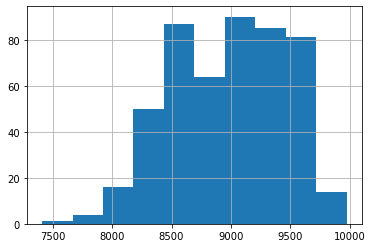

In [8]:
Close.head()

Close.tail(n=1)

Close.hist()

從圖 23.2 可以觀察到，從 2014 年 1 月 2 日到 2015 年 12 月 31 日，加權股價指數主要分佈在 7,500 點到 10,000 點之間。

> 圖 23.2：收盤指數的頻數分佈直方圖

接下來，計算收盤指數的最大值、最小值、平均數、中位數等說明性統計量，觀察收盤指數旳集中度和分佈度。

In [9]:
# 求最大值
Close.max()

# 求最小值
Close.min()

# 求均值
Close.mean()

# 求中位數
Close.median()

# 總結資料分佈情況
Close.describe()

9973.12

7410.34

8975.810467479674

9002.19

count     492.000000
mean     8975.810467
std       476.946252
min      7410.340000
25%      8599.502500
50%      9002.190000
75%      9370.940000
max      9973.120000
Name: Close, dtype: float64

上述對加權股價的分佈情況進行了簡單的分析，但單單一個直方圖和幾個簡單的敘述性統計量對預測未來所提供的線索相對有限，時間序列的相關模型需要更精細的模型來提供更多的資訊，接下來的幾個章節會更加深入探討分析時間序列的特徵。